<a href="https://colab.research.google.com/drive/10BFp32lDdjjJgLjO9FA-G0flzpvUuAq-?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

In [ ]:
!pip install pycaret

In [ ]:
# Import necessary libraries
import pandas as pd
from pycaret.clustering import *

**Dataset Used:**

KDD Cup 99 (Scikit Datasets)

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_kddcup99.html

In [ ]:
#Load the dataset
from sklearn.datasets import fetch_kddcup99
data = fetch_kddcup99(percent10=True)

In this cell, the dataset for clustering is loaded using the fetch_kddcup99 function from sklearn.datasets. The fetch_kddcup99 function retrieves a subset of the KDD Cup 99 dataset, which is a well-known dataset used in the evaluation of network intrusion detection systems. The percent10=True parameter loads only 10% of the entire dataset for quicker processing. This step is crucial for obtaining the dataset that will be used for DBSCAN clustering.

In [ ]:
# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 4. Explore the dataset
print(df.head())
print(df.info())
print(df['target'].value_counts())

  duration protocol_type  service   flag src_bytes dst_bytes land  \
0        0        b'tcp'  b'http'  b'SF'       181      5450    0   
1        0        b'tcp'  b'http'  b'SF'       239       486    0   
2        0        b'tcp'  b'http'  b'SF'       235      1337    0   
3        0        b'tcp'  b'http'  b'SF'       219      1337    0   
4        0        b'tcp'  b'http'  b'SF'       217      2032    0   

  wrong_fragment urgent hot  ... dst_host_srv_count dst_host_same_srv_rate  \
0              0      0   0  ...                  9                    1.0   
1              0      0   0  ...                 19                    1.0   
2              0      0   0  ...                 29                    1.0   
3              0      0   0  ...                 39                    1.0   
4              0      0   0  ...                 49                    1.0   

  dst_host_diff_srv_rate dst_host_same_src_port_rate  \
0                    0.0                        0.11   
1   

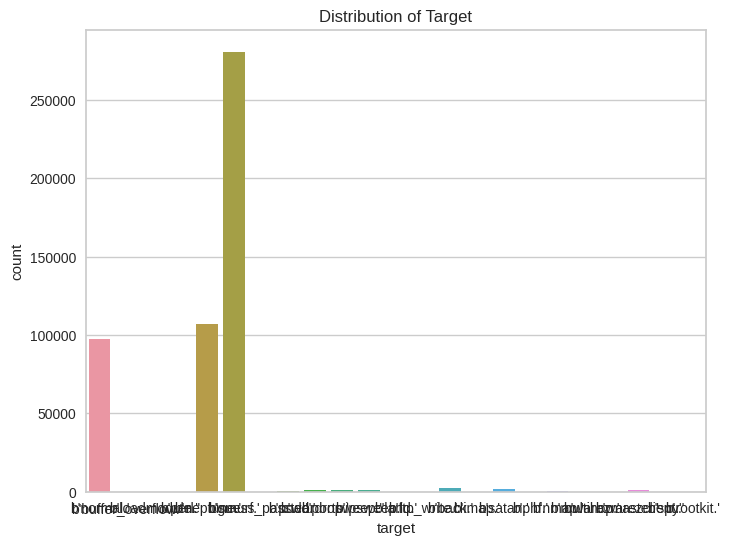

In [ ]:
# Additional code for Data Understanding (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target')
plt.show()

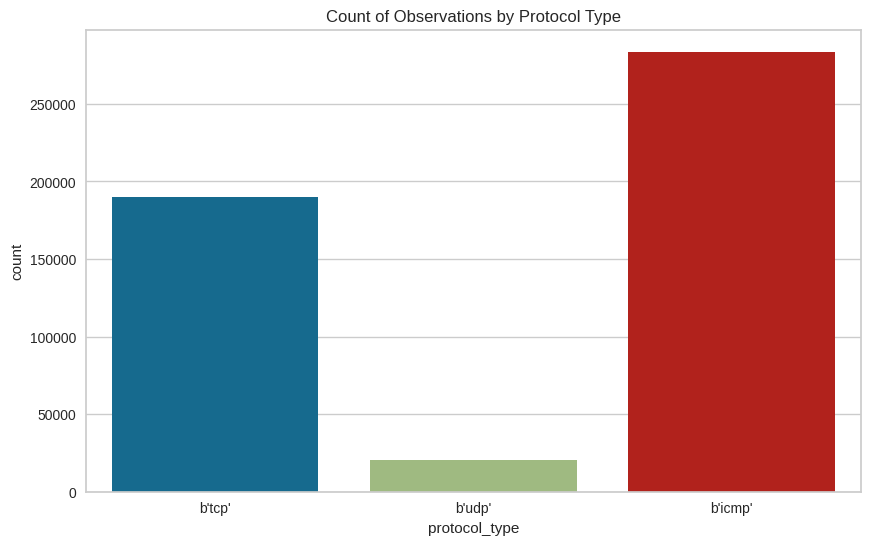

In [ ]:
# Example for countplot of a categorical feature
plt.figure(figsize=(10, 6))
sns.countplot(x='protocol_type', data=df)
plt.title('Count of Observations by Protocol Type')
plt.show()

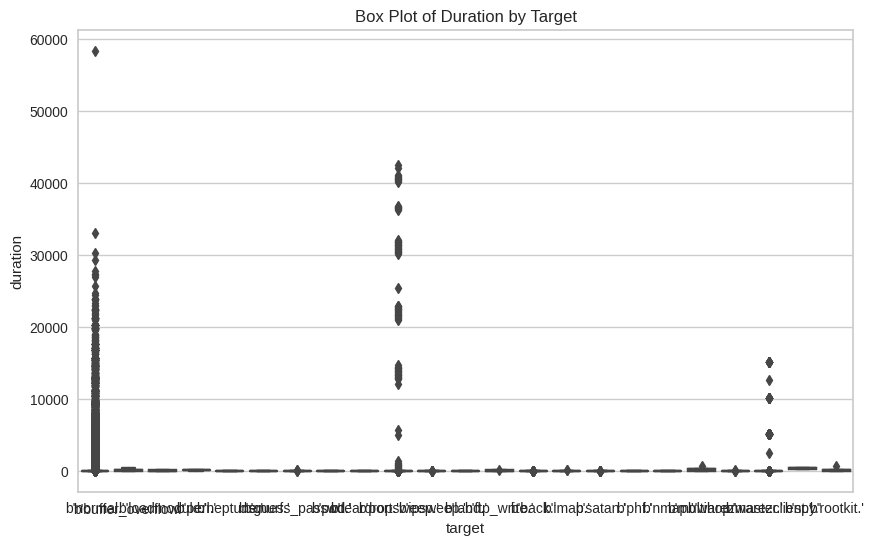

In [ ]:
# Example for target vs. features
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='duration', data=df)
plt.title('Box Plot of Duration by Target')
plt.show()

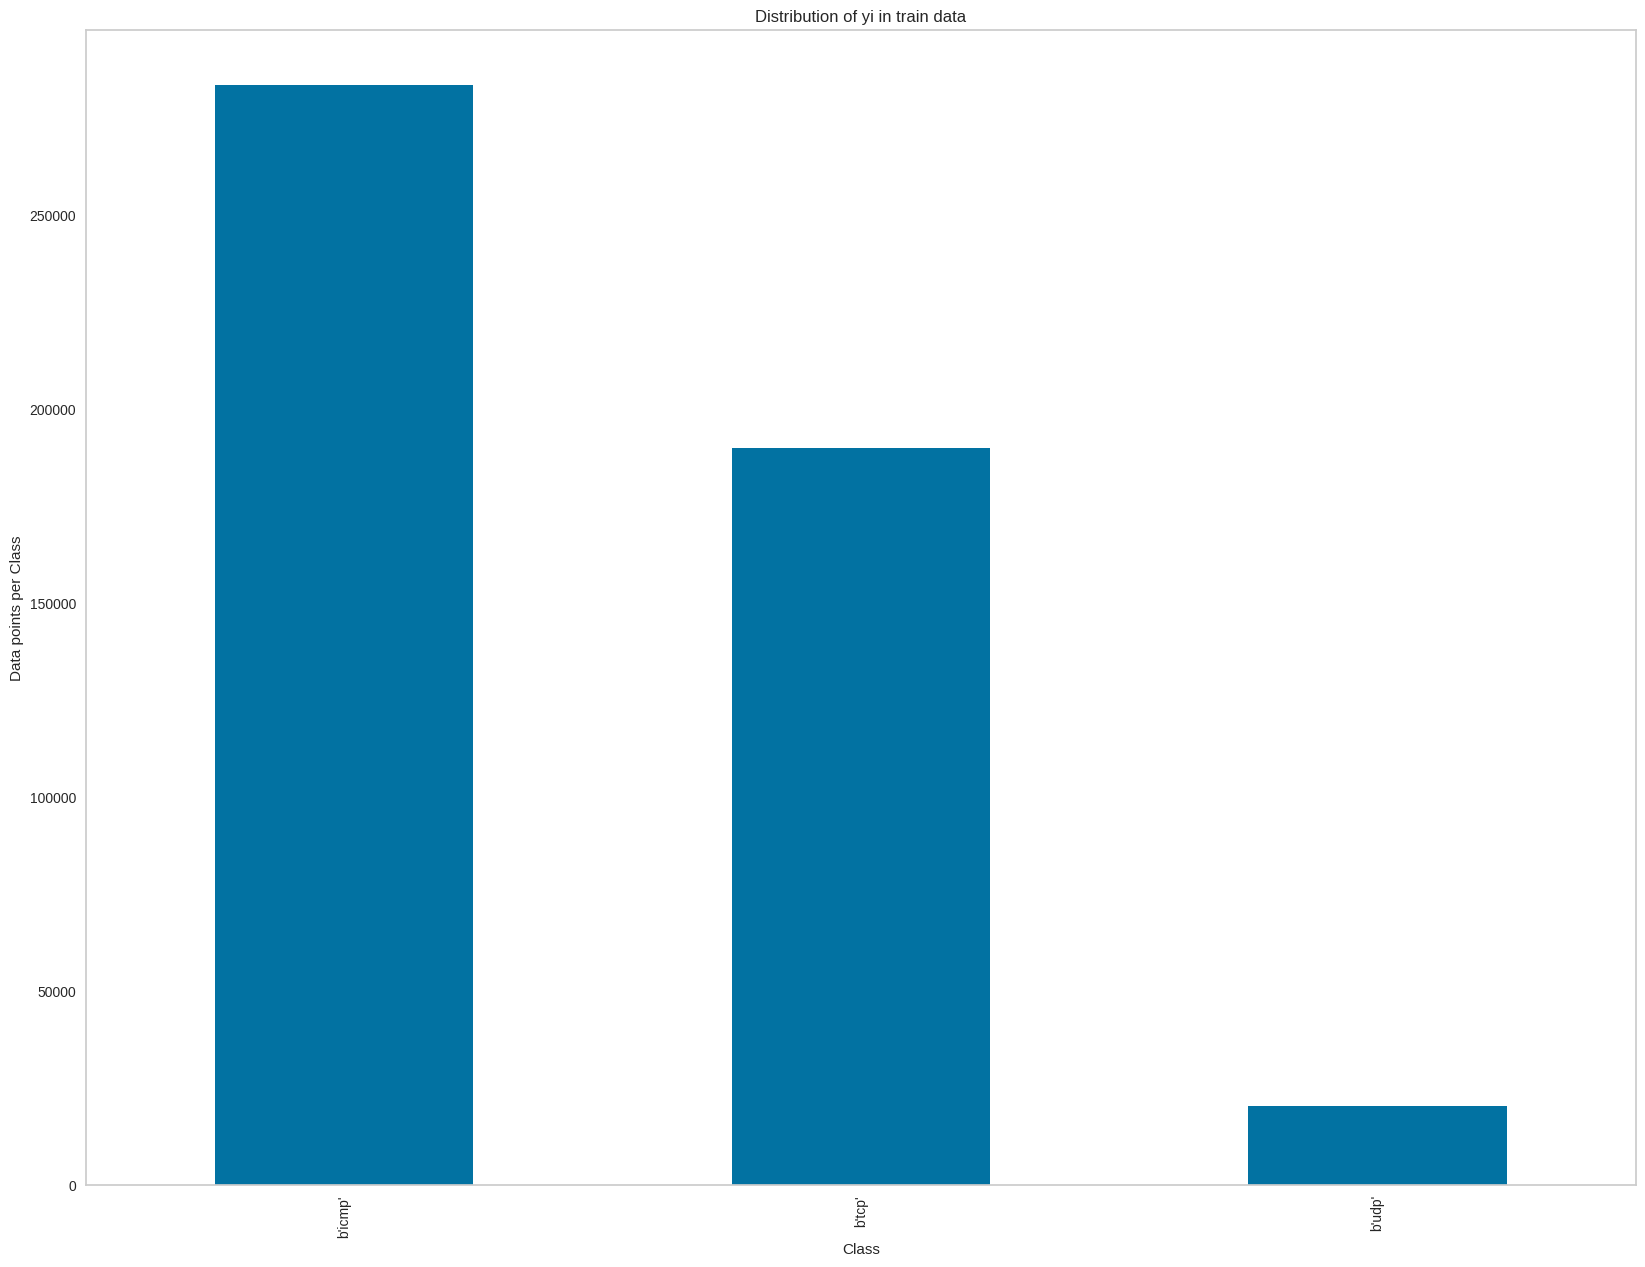

In [ ]:
plt.figure(figsize=(20,15))
class_distribution = df['protocol_type'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [ ]:
# 5. Preprocess the data
# (No preprocessing needed for this example)

# Phase 4: Modeling
# 6. Build the DBSCAN clustering model using pycaret
exp1 = setup(df.sample(frac=0.01), normalize=True, ignore_features=['target'])

,Description,Value
0,Session id,1944
1,Original data shape,"(4940, 42)"
2,Transformed data shape,"(4940, 2416)"
3,Ignore features,1
4,Ordinal features,8
5,Categorical features,41
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In this cell, the dataset is set up for clustering using PyCaret's setup function. The function takes the DataFrame df as input and performs initial preprocessing steps. The normalize=True argument is used to scale the features in the dataset, which is an important preprocessing step for clustering algorithms like DBSCAN that are sensitive to the scale of the data. The session_id parameter is set to ensure reproducibility of the results. The setup process is crucial for preparing the data and configuring the PyCaret environment for the subsequent clustering analysis.

In [ ]:
# Create Model for DBScan
dbscan_model = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3869,5.3378,2.8503,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

This cell creates a DBSCAN clustering model using PyCaret's create_model function. DBSCAN is chosen as the model type, and two key parameters are specified: eps, which sets the maximum distance between two samples for them to be considered as in the same neighborhood, and min_samples, which is the number of samples in a neighborhood for a point to be considered as a core point. These parameters are crucial in defining the clustering behavior of DBSCAN, as they directly influence how clusters are formed. The created model dbscan_model can then be used for fitting to the data and analyzing the clustering results.

In [ ]:
# Phase 5: Evaluation
# 7. Evaluate the model
evaluate_model(dbscan_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Visualize the clusters
plot_model(dbscan_model, plot='cluster')

The final cell in the notebook uses PyCaret's plot_model function to visualize the clustering results. The plot parameter is set to 'cluster', indicating that a cluster plot should be created. The feature argument specifies which feature to use for the plot, and label=True includes cluster labels in the visualization. This visualization provides an intuitive understanding of the spatial distribution of the clusters and is a key step in evaluating the effectiveness of the DBSCAN clustering.

In [ ]:
save_model(dbscan_model, "db_scan_clustering")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['duration', 'protocol_type',
                                              'service', 'flag', 'src_bytes',
                                              'dst_bytes', 'land',
                                              'wrong_fragment', 'urgent', 'hot',
                                              'num_failed_logins', 'logged_in',
                                              'num_compromised', 'root_shell',
                                              'su...
                                                                     'diff_srv_rate',
                                                                     'srv_diff_host_rate',
                                                                     'dst_host_count',
                       